In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import *
import pickle
import numpy as np
import pandas as pd
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [2]:
#!wget https://image-net.org/data/downsample/Imagenet32_val.zip

In [3]:
#!unzip Imagenet32_val.zip

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict
d = unpickle('val_data')
img_size = 32
x = d['data']
y = d['labels']

x = x/np.float32(255)

# Labels are indexed from 1, shift it so that indexes start at 0
y = [i-1 for i in y]
data_size = x.shape[0]

img_size2 = img_size * img_size

x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
x = x.reshape((x.shape[0], img_size, img_size, 3)).transpose(0, 3, 1, 2)


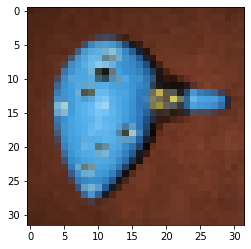

In [5]:
plt.imshow((x[30]).transpose(2,1,0))

In [6]:
import torchvision 
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True) 
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [7]:
COCO_INSTANCE_CATEGORY_NAMES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [8]:
from torchvision.models import detection
import numpy as np
import argparse
import pickle
import torch
import cv2


In [9]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)
# load the list of categories in the COCO dataset and then generate a
# set of bounding box colors for each class
CLASSES = COCO_INSTANCE_CATEGORY_NAMES
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))


cuda


In [10]:
MODELS = {
	"frcnn-resnet": detection.fasterrcnn_resnet50_fpn,
	"frcnn-mobilenet": detection.fasterrcnn_mobilenet_v3_large_320_fpn,
	"retinanet": detection.retinanet_resnet50_fpn
}
# load the model and set it to evaluation mode
refree = MODELS["frcnn-resnet"](pretrained=True, progress=True,
	num_classes=len(CLASSES), pretrained_backbone=True).to(DEVICE)
refree.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [11]:
class ImgDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, x):

        self.data = x

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


In [12]:
transformed_dataset = ImgDataset(x)

dataloader = DataLoader(transformed_dataset, batch_size=8, shuffle=False)

In [13]:
class semantic(nn.Module):
    def __init__(self):
        super(semantic, self).__init__()

        self.conv11 = nn.Conv2d(3, 64, stride=1, kernel_size=3, padding=1)
        self.bn11 = nn.BatchNorm2d(64)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12 = nn.BatchNorm2d(64)

        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn21 = nn.BatchNorm2d(128)
        self.conv22 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22 = nn.BatchNorm2d(128)

        self.conv31 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn31 = nn.BatchNorm2d(256)
        self.conv32 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32 = nn.BatchNorm2d(256)
        self.conv33 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33 = nn.BatchNorm2d(256)

        self.conv41 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn41 = nn.BatchNorm2d(512)
        self.conv42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42 = nn.BatchNorm2d(512)
        self.conv43 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43 = nn.BatchNorm2d(512)

        

        self.conv43u = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn43u = nn.BatchNorm2d(512)
        self.conv42u = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn42u = nn.BatchNorm2d(512)
        self.conv41u = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.bn41u = nn.BatchNorm2d(256)

        self.conv33u = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn33u = nn.BatchNorm2d(256)
        self.conv32u = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn32u = nn.BatchNorm2d(256)
        self.conv31u = nn.Conv2d(256,  128, kernel_size=3, padding=1)
        self.bn31u = nn.BatchNorm2d(128)

        self.conv22u = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn22u = nn.BatchNorm2d(128)
        self.conv21u = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.bn21u = nn.BatchNorm2d(64)

        self.conv12u = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn12u = nn.BatchNorm2d(64)
        self.conv11u = nn.Conv2d(64, 3, kernel_size=3, padding=1)



    def forward(self, x):
        
        x11 = F.relu(self.bn11(self.conv11(x)))
        x12 = F.relu(self.bn12(self.conv12(x11)))
        x1 = F.max_pool2d(x12,kernel_size=2, stride=2)

        
        x21 = F.relu(self.bn21(self.conv21(x1)))
        x22 = F.relu(self.bn22(self.conv22(x21)))
        x2 = F.max_pool2d(x22,kernel_size=2, stride=2) 


        
        x31 = F.relu(self.bn31(self.conv31(x2)))
        x32 = F.relu(self.bn32(self.conv32(x31)))
        x33 = F.relu(self.bn33(self.conv33(x32)))
        x3 = F.max_pool2d(x33,kernel_size=2, stride=2)

        
        x41 = F.relu(self.bn41(self.conv41(x3)))
        x42 = F.relu(self.bn42(self.conv42(x41)))
        x43 = F.relu(self.bn43(self.conv43(x42)))
        x4 = F.max_pool2d(x43,kernel_size=2, stride=2)

        
        x4u = F.interpolate(x4, scale_factor=2, mode='bilinear')
        x43u = F.relu(self.bn43u(self.conv43u(x4u)))
        x42u = F.relu(self.bn42u(self.conv42u(x43u)))
        x41u = F.relu(self.bn41u(self.conv41u(x42u)))
        

        
        x3u = F.interpolate(x41u, scale_factor=2, mode='bilinear')
        x33u = F.relu(self.bn33u(self.conv33u(x3u)))
        x32u = F.relu(self.bn32u(self.conv32u(x33u)))
        x31u = F.relu(self.bn31u(self.conv31u(x32u)))
        

        
        x2u = F.interpolate(x31u, scale_factor=2, mode='bilinear')
        x22u = F.relu(self.bn22u(self.conv22u(x2u)))
        x21u = F.relu(self.bn21u(self.conv21u(x22u)))
        

        
        x1u = F.interpolate(x21u, scale_factor=2, mode='bilinear')
        x12u = F.relu(self.bn12u(self.conv12u(x1u)))
        x11u = self.conv11u(x12u)
        

        return x11u

In [14]:
def CVD_Stim (img, CVD_type, simple_linear_transform=False):
    img = np.array(img)
    sizeImg = img.shape 
    if(len(sizeImg)==3):
        imgHeight = sizeImg[0]
        imgWidth  = sizeImg[1]
        imgB = img[:,:,0]
        imgG = img[:,:,1]
        imgR = img[:,:,2]
    else:
        imgHeight = 1
        imgWidth  = sizeImg[0]
        imgB = img[:,0]
        imgG = img[:,1]
        imgR = img[:,2]
    GAMMA  = 2.2
    imgRGBVec = np.concatenate(([imgR.flatten()], [imgG.flatten()], [imgB.flatten()]), axis = 0)
    imgRGBVec = np.power(imgRGBVec, GAMMA)

    rgb2lms = [[17.8824, 43.5161, 4.11935],[3.45565, 27.1554, 3.86714], [0.0299566, 0.184309, 1.46709]]
    lms2rgb = [[0.0809, -0.1305, 0.1167], [-0.0102, 0.0540, -0.1136], [-0.0004, -0.0041, 0.6935]]
    imgLMSVec = np.mat(rgb2lms) * np.mat(imgRGBVec)

    T = []
    if CVD_type == "Protanopia":
        T = [[0, 2.02344, -2.52581], [0, 1, 0] ,[0, 0, 1]] 
    elif CVD_type == "Deuteranope":
        T = [[1, 0, 0], [0.494207, 0, 1.24827], [0, 0, 1]]
    else:
        T = [[1, 0, 0], [0, 1, 0], [-0.395913, 0.801109, 0]]

    imgSimLMS = T * imgLMSVec
    imgSimRGBVec = lms2rgb*imgSimLMS

    if simple_linear_transform == True:
        transform_matrix = [[1, 0, 0], [0.7, 1, 0], [0.7, 0, 1]]
        imgSimRGBVec = imgRGBVec + transform_matrix (imgRGBVec - imgSimRGBVec)

    imgSimR = imgSimRGBVec[0,:]
    imgSimG = imgSimRGBVec[1,:]
    imgSimB = imgSimRGBVec[2,:]

    imgSimR = np.array(imgSimR, dtype = np.complex)
    imgSimG = np.array(imgSimG, dtype = np.complex)
    imgSimB = np.array(imgSimB, dtype = np.complex)


    imgSimR = np.real(np.power(imgSimR, 1/GAMMA))
    imgSimG = np.real(np.power(imgSimG, 1/GAMMA))
    imgSimB = np.real(np.power(imgSimB, 1/GAMMA))

    imgSimR = np.reshape(imgSimR, [imgHeight, imgWidth])
    imgSimG = np.reshape(imgSimG, [imgHeight, imgWidth])
    imgSimB = np.reshape(imgSimB, [imgHeight, imgWidth])

    imgSim =  cv2.merge((imgSimB,imgSimG,imgSimR))
    return imgSim


In [15]:
corrector = semantic().to(DEVICE)
#criterion = giou_loss
optimizer = optim.Adam(corrector.parameters())

Last Epoch


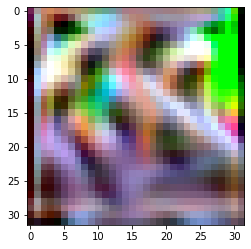

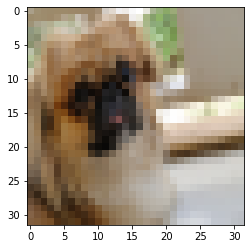

In [ ]:
for e in range(50):
    print("EPOCH",e)
    corrector.train()
    refree.eval()
    train_loss = 0
    train_accuracy = 0
    for i, img_batch in enumerate(dataloader):
        optimizer.zero_grad()
        img_batch = img_batch.type(torch.FloatTensor).to(DEVICE)
        corrected_pred = corrector(img_batch)
        #print(corrected_pred.shape)    
        cvd_img_lst = []
        for ib in range(8):
            temp_img = torch.permute(corrected_pred[ib], (1,2,0))
            temp_img = temp_img.cpu().detach().numpy()
            temp_img = CVD_Stim(temp_img, "Protanopia")
            temp_img = torch.Tensor(temp_img).to(DEVICE)
            corrected_pred[ib].data = torch.permute(temp_img, (2,0,1)).data

        Prediction = corrected_pred[0]
        OrgImg = img_batch[0]

        Prediction = torch.permute(Prediction, (1,2,0)).cpu().detach().numpy()
        OrgImg = torch.permute(OrgImg, (1,2,0)).cpu().detach().numpy()

        plt.imshow(Prediction)
        plt.show()
        plt.imshow(OrgImg)
        plt.show()
        refree.eval()
        detectionsOrg = refree(img_batch)
        refree.train()
        loss_dict = refree(corrected_pred, detectionsOrg)
        loss = sum(loss for loss in loss_dict.values())
        train_loss+=loss.item()
        #loss = criterion(detections[0]['boxes'], detectionsOrg[0]['boxes'])
        refree.eval()

        loss.backward()

        optimizer.step()
        #     for name, wt in corrector.named_parameters():
    #         if 'weight' in name:
    #                 print(wt.grad)
    #     break
    print(train_loss/len(dataloader))